In [1]:
import time
import os
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import imageio
from glob import glob
from tqdm import tqdm
import cv2
from albumentations import HorizontalFlip, VerticalFlip, Rotate
from torch.utils.data import Dataset

In [2]:
data_path='/content/drive/MyDrive/small-retina/'

#seeding the randomness
def seeding(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']= str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic= True
    

#create directory
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

        
def epoch_time(start_time , end_time):
    elapsed_time= end_time- start_time
    elapsed_mins= int(elapsed_time/60)
    elapsed_secs= int(elapsed_time- (elapsed_mins*60))
    return elapsed_mins, elapsed_secs

def load_data(path):
    train_x= sorted(glob(os.path.join(path, 'training', 'images', '*.tif')))
    train_y= sorted(glob(os.path.join(path, 'training', '1st_manual', '*.gif')))
    
    test_x= sorted(glob(os.path.join(path, 'test', 'images', '*.tif')))
    test_y= sorted(glob(os.path.join(path, 'test', '1st_manual', '*.gif')))
    
    return (train_x, train_y), (test_x, test_y)

def augment_data(images, masks, save_path, augment= True):
    size= (512, 512)
    
    for idx, (x, y) in tqdm(enumerate(zip(images, masks)), total= len(images)):
        """extract the name:
         x.split('\\')[-1].split('.')[0] --> 31_training
         x.split('\\')[-1].split('.')    --> ['31_training', 'tif']
         x.split('\\')[-1]               --> 31_training.tif
         x.split('\\') -->['D:', 'Ali', 'python files', 'retina', 'small-drive', 'training', 'images', '31_training.tif']
        """
        name= x.split('/')[-1].split('.')[0]
        #print(name)
        
        """reading images and masks"""
        
        x= cv2.imread(x, cv2.IMREAD_COLOR)
        y= imageio.mimread(y)[0]
        print(x.shape, y.shape)
    
        if augment == True:
            aug= HorizontalFlip(p=1.0)
            augmented= aug(image=x, mask=y)
            x1= augmented['image']
            y1= augmented['mask']
            
            aug= VerticalFlip(p=1)
            augmented= aug(image=x, mask=y)
            x2= augmented['image']
            y2= augmented['mask']
            
            aug= Rotate(limit= 45, p=1.0)
            augmented= aug(image=x, mask=y)
            x3= augmented['image']
            y3= augmented['mask']
            
            X= [x, x1, x2, x3]
            Y= [y, y1, y2, y3]
            
        
        else:
            X= [x]
            Y= [y]
    
        index= 0
        for i,m in zip(X,Y):
            i= cv2.resize(i, size)
            m= cv2.resize(m, size)
            
            tmp_image_name= f'{name}_{index}.png'
            tmp_mask_name= f'{name}_{index}.png'
            
            image_path= os.path.join(save_path, 'image', tmp_image_name)
            mask_path= os.path.join(save_path, 'mask', tmp_mask_name)
            
            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)
            
            index +=1
    

if __name__ == '__main__':
    # seeding
    np.random.seed(42)

    #load data
    data_path='/content/drive/MyDrive/small-retina/'
    (train_x, train_y), (test_x, test_y)= load_data(data_path)
    
    print(f'Train: {len(train_x)}- {len(train_y)}')
    print(f'Test: {len(test_x)}- {len(test_y)}')

    
    #create direction to save augmented data
    create_dir('/content/drive/MyDrive/new_retinal_data/train/image/')
    create_dir('/content/drive/MyDrive/new_retinal_data/train/mask/')
    create_dir('/content/drive/MyDrive/new_retinal_data/test/image/')
    create_dir('/content/drive/MyDrive/new_retinal_data/test/mask/')
    
    #augmention data
    augment_data(train_x, train_y, '/content/drive/MyDrive/new_retinal_data/train/', augment= True)
    augment_data(test_x, test_y, '/content/drive/MyDrive/new_retinal_data/test/', augment= False)

Train: 10- 10
Test: 10- 10


 10%|█         | 1/10 [00:01<00:10,  1.17s/it]

(584, 565, 3) (584, 565)


 20%|██        | 2/10 [00:01<00:06,  1.16it/s]

(584, 565, 3) (584, 565)


 30%|███       | 3/10 [00:02<00:05,  1.34it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 50%|█████     | 5/10 [00:03<00:03,  1.46it/s]

(584, 565, 3) (584, 565)
(584, 565, 3) (584, 565)


 60%|██████    | 6/10 [00:04<00:02,  1.53it/s]

(584, 565, 3) (584, 565)


 80%|████████  | 8/10 [00:05<00:01,  1.43it/s]

(584, 565, 3) (584, 565)


 90%|█████████ | 9/10 [00:06<00:00,  1.32it/s]

(584, 565, 3) (584, 565)


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


(584, 565, 3) (584, 565)


 10%|█         | 1/10 [00:00<00:04,  2.02it/s]

(584, 565, 3) (584, 565)


 20%|██        | 2/10 [00:01<00:04,  1.77it/s]

(584, 565, 3) (584, 565)


 30%|███       | 3/10 [00:01<00:04,  1.73it/s]

(584, 565, 3) (584, 565)


 40%|████      | 4/10 [00:02<00:03,  1.74it/s]

(584, 565, 3) (584, 565)


 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

(584, 565, 3) (584, 565)


 60%|██████    | 6/10 [00:03<00:02,  1.63it/s]

(584, 565, 3) (584, 565)


 70%|███████   | 7/10 [00:04<00:01,  1.52it/s]

(584, 565, 3) (584, 565)


 80%|████████  | 8/10 [00:04<00:01,  1.51it/s]

(584, 565, 3) (584, 565)


 90%|█████████ | 9/10 [00:05<00:00,  1.42it/s]

(584, 565, 3) (584, 565)


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

(584, 565, 3) (584, 565)


In [4]:
 #load dataset
train_x= sorted(glob(
    '/content/drive/MyDrive/new_retinal_data/train/image/*'))
train_y= sorted(glob(
    '/content/drive/MyDrive/new_retinal_data/train/mask/*'))

valid_x= sorted(glob(
    '/content/drive/MyDrive/new_retinal_data/test/image/*'))
valid_y= sorted(glob(
    '/content/drive/MyDrive/new_retinal_data/test/mask/*'))

data_str= f'Dataset Size:\nTrain: {len(train_x)}- Valid: {len(valid_x)}\n'
print(data_str)
train_x

Dataset Size:
Train: 40- Valid: 10



['/content/drive/MyDrive/new_retinal_data/train/image/31_training_0.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/31_training_1.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/31_training_2.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/31_training_3.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/32_training_0.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/32_training_1.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/32_training_2.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/32_training_3.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/33_training_0.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/33_training_1.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/33_training_2.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/33_training_3.png',
 '/content/drive/MyDrive/new_retinal_data/train/image/34_training_0.png',
 '/content/drive/MyDrive/new_retinal_d

In [ ]:
#hyperparams:
H= 512
W= 512
size= (H,W)
batch_size= 5
num_epochs= 50
lr= 1e-4
checkpoint_path= '/content/drive/MyDrive/new_retinal_data1/checkpoint.pth' 


In [ ]:
class conv_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.conv1= nn.Conv2d(in_c, out_c, kernel_size= 3, padding= 1)
        self.bn1= nn.BatchNorm2d(out_c)

        self.conv2= nn.Conv2d(out_c, out_c, kernel_size= 3, padding= 1)
        self.bn2= nn.BatchNorm2d(out_c)

        self.relu= nn.ReLU()

    def forward(self, inputs):
        x= self.conv1(inputs)
        x= self.bn1(x)
        x= self.relu(x)

        x= self.conv2(x)
        x= self.bn2(x)
        x= self.relu(x)

        return x

class encoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.conv= conv_block(in_c, out_c)
        self.pool= nn.MaxPool2d((2,2))

    def forward(self, inputs):
        x= self.conv(inputs)
        p= self.pool(x)
        return x, p

class decoder_block(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()

        self.up= nn.ConvTranspose2d( in_c, out_c, kernel_size=2, stride= 2, padding=0)
        self.conv= conv_block(out_c + out_c, out_c)

    def forward(self, inputs, skip):
        x= self.up(inputs)
        x = torch.cat([x, skip], axis= 1)
        x= self.conv(x)
        return x

class build_unet(nn.Module):
    def __init__(self):
        super().__init__()

        """Encoder"""
        self.e1= encoder_block(3, 64)
        self.e2= encoder_block(64, 128)
        self.e3= encoder_block(128, 256)
        self.e4= encoder_block(256, 512)

        """Bottleneck"""
        self.b= conv_block(512, 1024)

        """Decoder"""
        self.d1= decoder_block(1024, 512)
        self.d2= decoder_block(512, 256)
        self.d3= decoder_block(256, 128)
        self.d4= decoder_block(128, 64)

        """Classifier"""
        self.outputs= nn.Conv2d(64, 1, kernel_size=1, padding=0)

  
    def forward(self, inputs):
        s1, p1= self.e1(inputs)
        s2, p2= self.e2(p1)
        s3, p3= self.e3(p2)
        s4, p4= self.e4(p3)

        #print(s1.shape, p1.shape)
        #print(s2.shape, p2.shape)
        #print(s3.shape, p3.shape)
        #print(s4.shape, p4.shape)

        b= self.b(p4)
        d1= self.d1(b, s4)
        d2= self.d2(d1, s3)
        d3= self.d3(d2, s2)
        d4= self.d4(d3, s1)

        outputs= self.outputs(d4)
        
        return outputs



if __name__ == '__main__':
    x= torch.randn((2, 3, 512, 512))
    f= build_unet()
    y= f(x)
    print(y.shape)

torch.Size([2, 1, 512, 512])


In [ ]:
class DiceLoss(nn.Module):
    def __init__(self, weight= None, size_average= True):
        super(DiceLoss, self).__init__()
        
    def forward(self, inputs, targets, smooth=1):
        
        inputs= torch.sigmoid(inputs)
        
        inputs= inputs.view(-1)
        targets= targets.view(-1)
        
        intersection = (inputs * targets).sum()                            
        dice = (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)
        
        return 1- dice
    
class DICEBCELoss(nn.Module):
    def __init__(self, weight= None, size_average= True):
        super(DICEBCELoss, self).__init__()
    
    def forward(self, inputs, targets, smooth=1):
        inputs= torch.sigmoid(inputs)
        
        inputs= inputs.view(-1)
        targets= targets.view(-1)
        
        intersection= (inputs+ targets).sum()
        dice= 1- (2*intersection + smooth)/(inputs.sum()+ targets.sum() + smooth)
        BCE= F.binary_cross_entropy(inputs, targets, reduction= 'mean')
        Dice_BCE= BCE+ dice_loss
        
        return Dice_BCE


In [ ]:
class DriveDataset(Dataset):
    def __init__(self, images_path, masks_path):
        
        self.images_path= images_path
        self.masks_path= masks_path
        self.n_samples= len(images_path)
        print(len(images_path))

    def __getitem__(self, index):
        
        #raeding images
        image= cv2.imread(self.images_path[index], cv2.IMREAD_COLOR)
        image= image/255.0                  #(512,512,3)
        image= np.transpose(image, (2,0,1)) #(3,512,512)
        image= image.astype(np.float32)
        image= torch.from_numpy(image)
        
        #raeding masks
        mask= cv2.imread(self.masks_path[index], cv2.IMREAD_GRAYSCALE)
        mask= mask/255.0                  #(512,512)
        mask= np.expand_dims(mask, axis=0)      #(1,512,512)
        mask= mask.astype(np.float32)
        mask= torch.from_numpy(mask)
        

        return image, mask
    
    def __len__(self):
      return self.n_samples




    

In [ ]:
# dataset and loader
train_dataset= DriveDataset(train_x, train_y)
valid_dataset= DriveDataset(valid_x, valid_y)

train_loader= torch.utils.data.DataLoader(train_dataset, batch_size= batch_size, shuffle=True, num_workers=2)

valid_loader= torch.utils.data.DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2)



40
10


In [ ]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model= build_unet()
model= model.to(device)
optimizer= torch.optim.Adam(model.parameters(), lr= lr)
schuduler= torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min') 
loss_fn = DiceLoss() #if model.n_classes > 1 else nn.BCEWithLogitsLoss()

In [ ]:
def train( model, loader, optimizer, loss_fn, device):
    epoch_loss= 0.0
    model.train()
    for x, y in loader:
        x= x.to(device, dtype= torch.float32)
        y= y.to(device, dtype= torch.float32)
        
        optimizer.zero_grad()
        y_pred= model(x)
        #y_pred = y_pred.unsqueeze(1)
        
        loss= loss_fn(y_pred, y)
        loss.backward()
        
        optimizer.step()
        epoch_loss += loss.item()
        
    epoch_loss= epoch_loss/len(loader)
    return epoch_loss

def evaluate( model, loader, loss_fn, device):
    epoch_loss= 0.0
    
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x= x.to(device, dtype= torch.float32)
            y= y.to(device, dtype= torch.float32)
            
            y_pred= model(x)
            loss= loss_fn(y_pred, y)
            epoch_loss += loss.item()
            
        epoch_loss= epoch_loss/len(loader)
    return epoch_loss

In [ ]:
test_x= sorted(glob(
    '/content/drive/MyDrive/new_retinal_data1/test/image/*'))
test_y= sorted(glob(
    '/content/drive/MyDrive/new_retinal_data1/test/mask/*'))

In [ ]:
#training the model

best_valid_loss= float('inf')
Train_loss= []
Valid_loss= []

start_time= time.time()
for epoch in range(num_epochs):
    epoch_time= time.time()
    
    train_loss= train(model, train_loader, optimizer, loss_fn, device)
    valid_loss= evaluate(model, valid_loader, loss_fn, device)
    Train_loss.append(train_loss)
    Valid_loss.append(valid_loss)
    """
    #saving model
    if valid_loss < best_valid_loss:
        data_str= f'Valid Loss imporoved form {best_valid_loss:2.4f} to {valid_loss}'
        print(data_str)
        
        best_valid_loss= valid_loss
        torch.save(model.state_dict(), checkpoint_path)
    """
    print(f'Epoch:{epoch+1} | time elapsed: {(time.time()- epoch_time)/60: .2f}min')
    print(f'\tTrain Loss: {train_loss:.3f}\n \tVal Loss: {valid_loss:.3f}\n')

print(f' Total training time: {(time.time()- start_time)/60: .2f} min |')

Epoch:1 | time elapsed:  0.17min
	Train Loss: 0.746
 	Val Loss: 0.850

Epoch:2 | time elapsed:  0.17min
	Train Loss: 0.709
 	Val Loss: 0.851

Epoch:3 | time elapsed:  0.17min
	Train Loss: 0.682
 	Val Loss: 0.843

Epoch:4 | time elapsed:  0.17min
	Train Loss: 0.666
 	Val Loss: 0.788

Epoch:5 | time elapsed:  0.17min
	Train Loss: 0.655
 	Val Loss: 0.715

Epoch:6 | time elapsed:  0.18min
	Train Loss: 0.647
 	Val Loss: 0.677

Epoch:7 | time elapsed:  0.17min
	Train Loss: 0.639
 	Val Loss: 0.648

Epoch:8 | time elapsed:  0.18min
	Train Loss: 0.634
 	Val Loss: 0.633

Epoch:9 | time elapsed:  0.18min
	Train Loss: 0.627
 	Val Loss: 0.623

Epoch:10 | time elapsed:  0.18min
	Train Loss: 0.620
 	Val Loss: 0.620

Epoch:11 | time elapsed:  0.18min
	Train Loss: 0.615
 	Val Loss: 0.616

Epoch:12 | time elapsed:  0.18min
	Train Loss: 0.609
 	Val Loss: 0.607

Epoch:13 | time elapsed:  0.18min
	Train Loss: 0.604
 	Val Loss: 0.604

Epoch:14 | time elapsed:  0.18min
	Train Loss: 0.597
 	Val Loss: 0.599

E

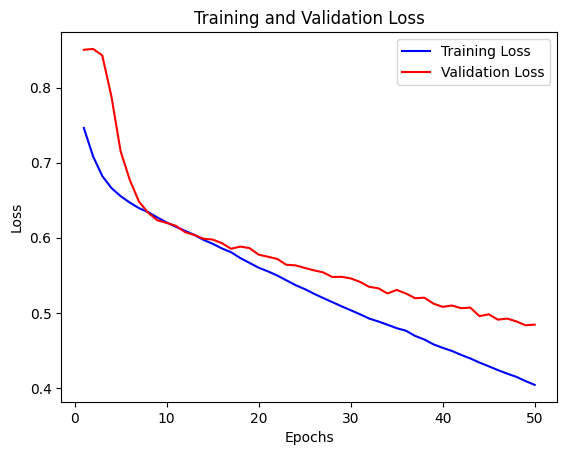

In [ ]:
# Plot and label the training and validation loss values
plt.plot(np.arange(1,51), Train_loss, label='Training Loss', c='blue')
plt.plot(np.arange(1,51), Valid_loss, label='Validation Loss', c= 'red')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

def calculate_metrics(y_true, y_predict):
  #ground truth
  y_true= y_true.cpu().numpy()
  y_true= y_true > .5
  y_true= y_true.astype(np.uint8)
  y_true= y_true.reshape(-1)

  #prediction
  y_predict= y_predict.detach().cpu().numpy()
  y_predict= y_predict > .5
  y_predict= y_predict.astype(np.uint8)
  y_predict= y_predict.reshape(-1)

  score_jaccard= jaccard_score(y_true, y_predict)
  score_f1 = f1_score(y_true, y_predict)
  score_recall= recall_score(y_true, y_predict)
  score_precision= precision_score(y_true, y_predict)
  score_acc= accuracy_score(y_true, y_predict)

  return ([score_jaccard, score_f1, score_recall, score_precision, score_acc])

def mask_parse(mask):
  mask= np.expand_dims(mask, axis=1) #(512, 512, 1)
  mask= np.concatenate([mask, mask, mask], axis=1) #(512, 512, 3)
  return mask


In [ ]:

""" 
loading  checkpoits if applicable:

device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model= build_unet()
model.load_state_dict(torch.load(checkpoit_path, map_location= device))
model = model.to(device)
model.eval()
"""

" \nloading  checkpoits if applicable:\n\ndevice= torch.device('cuda' if torch.cuda.is_available() else 'cpu')\nmodel= build_unet()\nmodel.load_state_dict(torch.load(checkpoit_path, map_location= device))\nmodel = model.to(device)\nmodel.eval()\n"

In [ ]:
line= np.ones((size[1], 10, 3))*128
line

array([[[128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.],
        ...,
        [128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.]],

       [[128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.],
        ...,
        [128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.]],

       [[128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.],
        ...,
        [128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.]],

       ...,

       [[128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.],
        ...,
        [128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.]],

       [[128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.],
        ...,
        [128., 128., 128.],
        [128., 128., 128.],
        [128., 128., 128.]],

       [[128., 128., 128.],
        [128., 128., 128.],
        [128., 1

In [ ]:
"""Test"""
metrics_score= [0.0, 0.0, 0.0, 0.0, 0.0]
Jaccard=[]
F1=[]
Accuracy=[]
Recall=[]
Precision=[]


for i, (x,y) in tqdm(enumerate(zip(test_x, test_y)), total= len(test_x)):
  
  """extract the names"""
  name= x.split('/')[-1].split('.')[0]
  
  """reading images"""
  image= cv2.imread(x, cv2.IMREAD_COLOR)   #(512, 512, 3)
  x= np.transpose(image, (2,0,1))          #(3,512,512)
  x= x/255.0                               #(512,512,3)
  x= np.expand_dims(x, axis=0)             #(1,3,512,512)
  x= x.astype(np.float32)
  x= torch.from_numpy(x)
  x= x.to(device)
  
  #raeding masks
  mask= cv2.imread(y, cv2.IMREAD_GRAYSCALE)
  #mask= cv2.resize(mask, size)
  y= np.expand_dims(mask, axis=0)      #(1,512,512)
  y= y/255.0
  y= np.expand_dims(y, axis=0)         #(1, 1, 512, 512)     
  y= y.astype(np.float32)
  y= torch.from_numpy(y)
  y= y.to(device)

  with torch.no_grad():
    
    y_pred= model(x)
    y_pred= torch.sigmoid(y_pred)
    
    
  """saving masks
  ori_mask= mask_parse(mask)
  y_pred= mask_parse(y_pred)
  line= np.ones((size[1], 10, 3))*128

  cat_images= np.concatenate(
      [image, line, ori_mask, line, y_pred*255], axis=1
  )
  cv2.imwrite(f'results/{name}.png', cat_images)
"""


  jaccard= calculate_metrics(y, y_pred)[0]
  Jaccard.append(jaccard)                     #metrics_score[0]/len(test_x)
  f1= calculate_metrics(y, y_pred)[1]   
  F1.append(f1)                               #metrics_score[1]/len(test_x)
  recall= calculate_metrics(y, y_pred)[2]
  Recall.append(recall)                        #metrics_score[2]/ len(test_x)
  precision= calculate_metrics(y, y_pred)[3] 
  Precision.append(precision)                 #metrics_score[3]/ len(test_x)
  acc= calculate_metrics(y, y_pred)[4]  
  Accuracy.append(acc)                       #metrics_score[4]/len(test_x)


print(f'Jaccard: {np.mean(Jaccard): 1.4f} - F1: {np.mean(F1): 1.4f} - Recall: {np.mean(Recall): 1.4f} - Precision: {np.mean(Precision): 1.4f} - Accuracy: {np.mean(Accuracy): 1.4f}')

#fps= 1/np.mean(time_taken)
#print('FPS:', fps)





100%|██████████| 10/10 [00:13<00:00,  1.35s/it]

Jaccard:  0.6157 - F1:  0.7611 - Recall:  0.7481 - Precision:  0.7858 - Accuracy:  0.9600


In [ ]:
img= valid_x[1]
image= cv2.imread(img)   #(512, 512, 3)
x= np.transpose(image, (2,0,1))          #(3,512,512)
x= x/255.0                               #(512,512,3)
x= np.expand_dims(x, axis=0)             #(1,3,512,512)
x= x.astype(np.float32)
x= torch.from_numpy(x)
x= x.to(device)
x

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
          ...,
          [0.0157, 0.0157, 0.0196,  ..., 0.0275, 0.0275, 0.0235],
          [0.0196, 0.0196, 0.0235,  ..., 0.0314, 0.0314, 0.0275],
          [0.0275, 0.0275, 0.0275,  ..., 0.0078, 0.0078, 0.0078]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
          ...,
          [0.0235, 0.0235, 0.0235,  ..., 0.0275, 0.0275, 0.0235],
          [0.0275, 0.0275, 0.0275,  ..., 0.0275, 0.0235, 0.0275],
          [0.0235, 0.0235, 0.0235,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [ ]:
output= model(x)
out= output.detach().cpu().numpy()[0]  #(1, 512, 512)
img= np.transpose(out, (1,2,0))        #(512, 512, 1)

Text(0.5, 1.0, 'Segmentation Result')

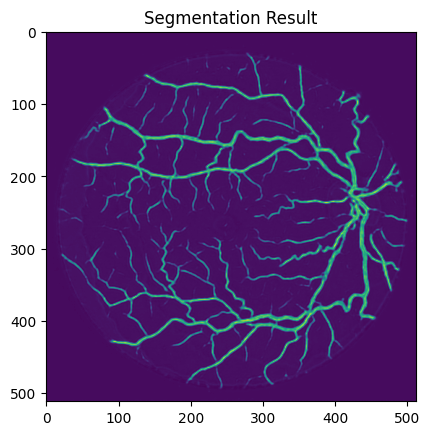

In [ ]:
plt.imshow(img)
plt.title('Segmentation Result')

Text(0.5, 1.0, 'True Segmentation')

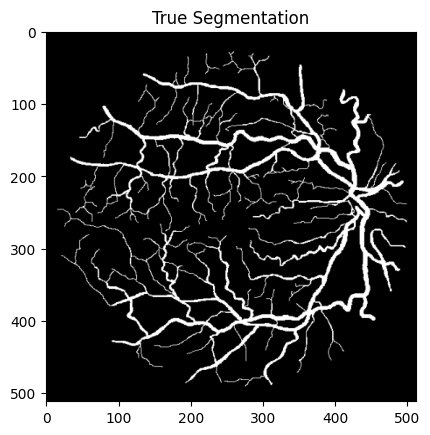

In [11]:
img1= valid_y[1]
image1= cv2.imread(img1)   #(512, 512, 3)
plt.imshow(image1)
plt.title('True Segmentation')

In [27]:
img1= cv2.imread('/content/download.png')
img2= cv2.imread('/content/download (1).png')

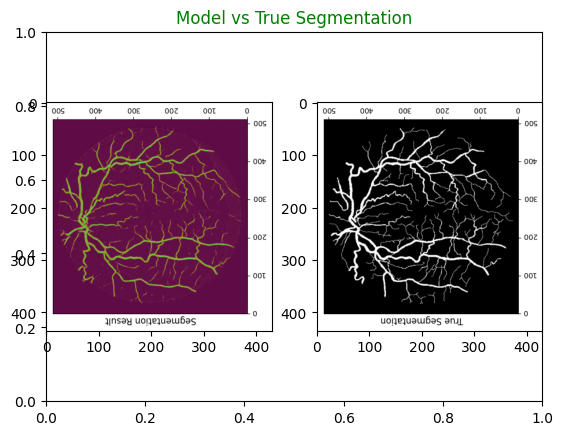

In [35]:
f = plt.figure()
plt.title('Model vs True Segmentation', c= 'green')
f.add_subplot(1,2, 1)
plt.imshow(np.rot90(img1,2))
f.add_subplot(1,2, 2)
plt.imshow(np.rot90(img2,2))
plt.show()